<a href="https://colab.research.google.com/github/san9roy/Renewable-Energy-and-Infrastructure/blob/main/Renewable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Dataset found: ./renewable_energy.csv

Global Renewable Energy Production Statistics:
count    1.201700e+04
mean     1.322108e+04
std      9.203502e+04
min      0.000000e+00
25%      9.580000e+00
50%      7.486000e+01
75%      1.816018e+03
max      1.894019e+06
Name: Value, dtype: float64


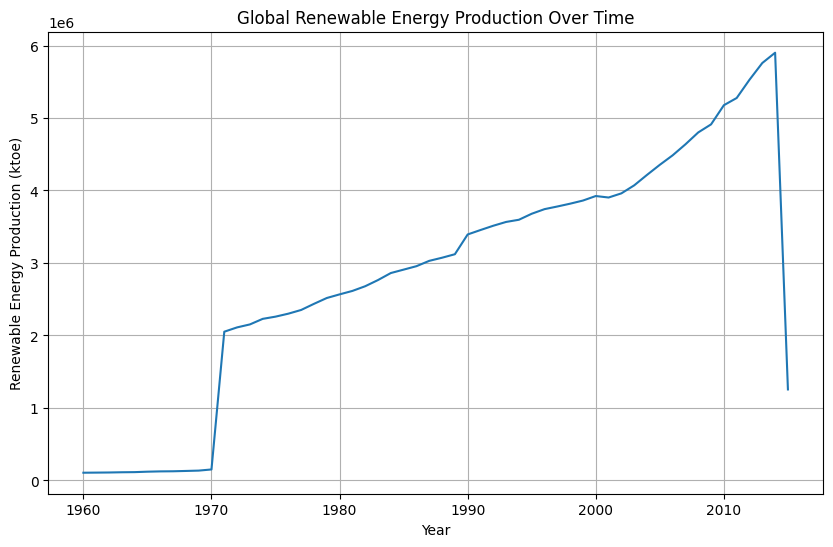

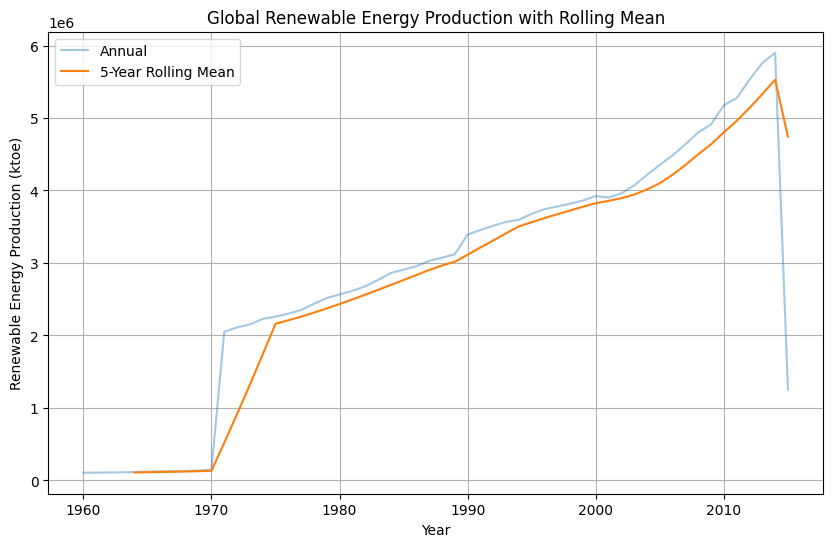

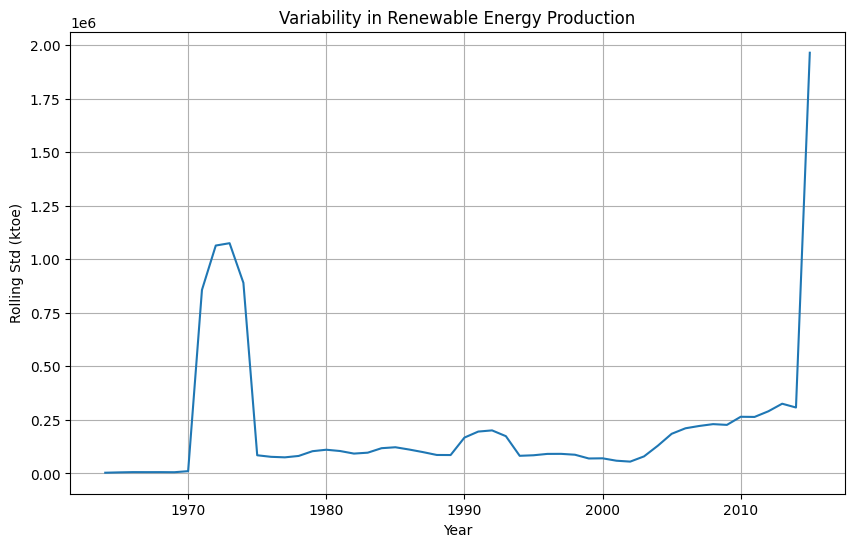

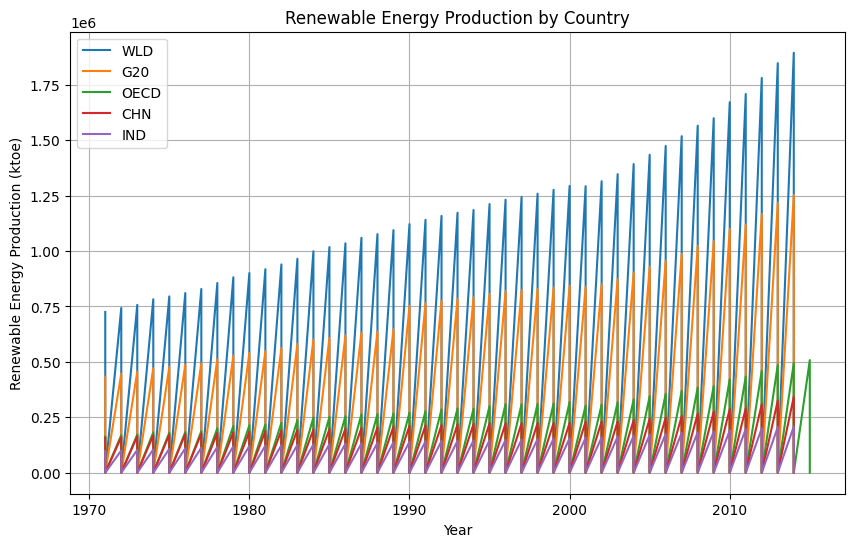

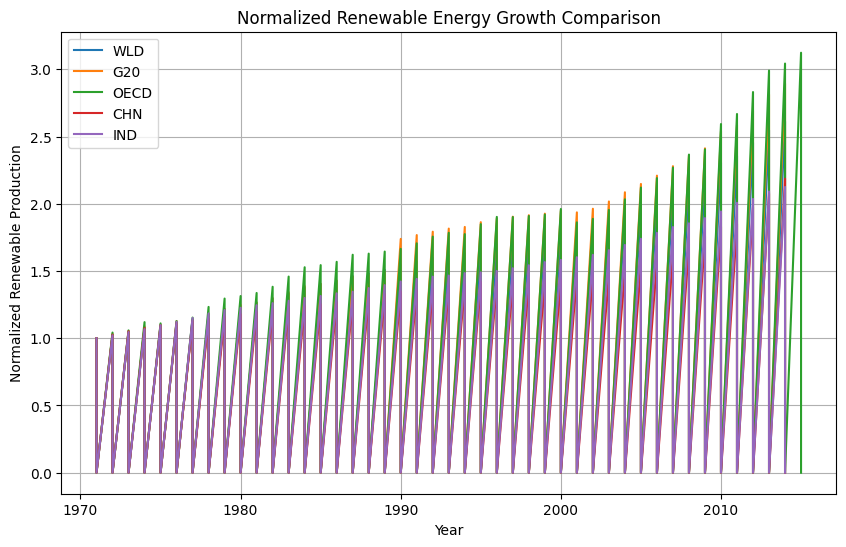

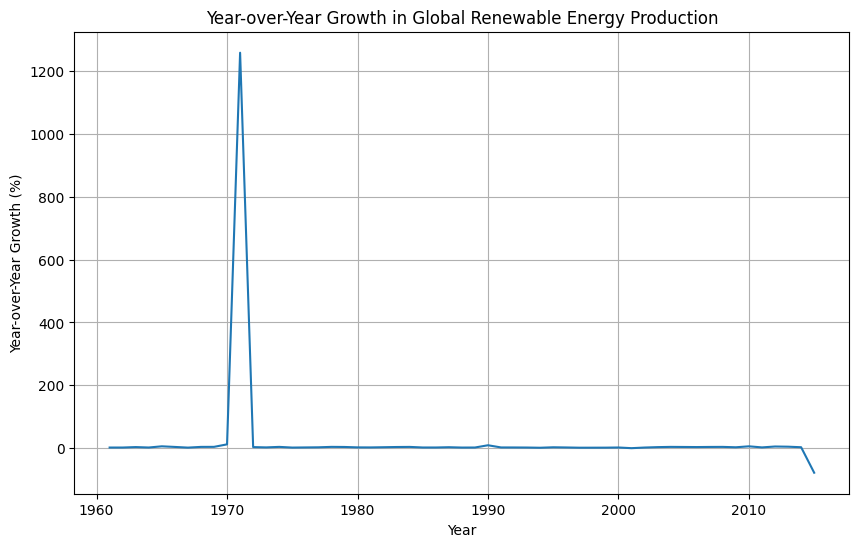


Thermal System Efficiency Statistics:
count    365.000000
mean       0.711653
std        0.130687
min        0.335013
25%        0.619037
50%        0.709868
75%        0.792986
max        1.118855
Name: Efficiency, dtype: float64


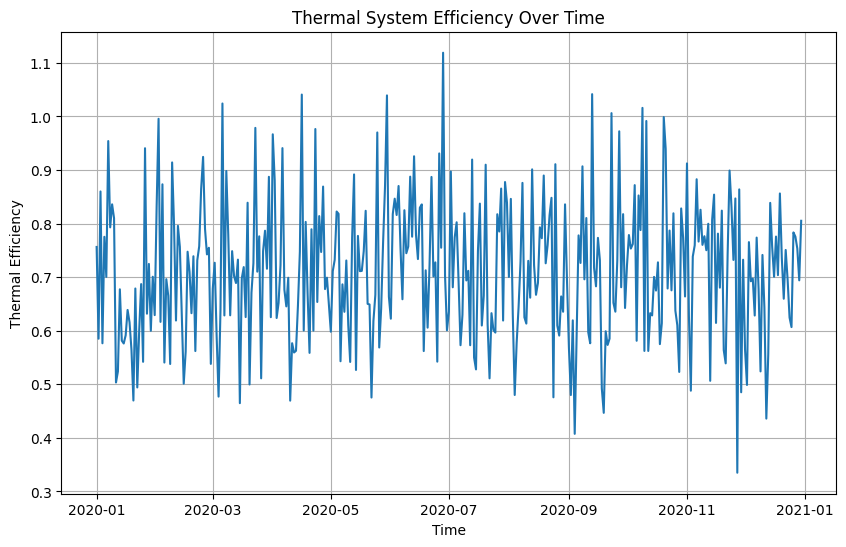

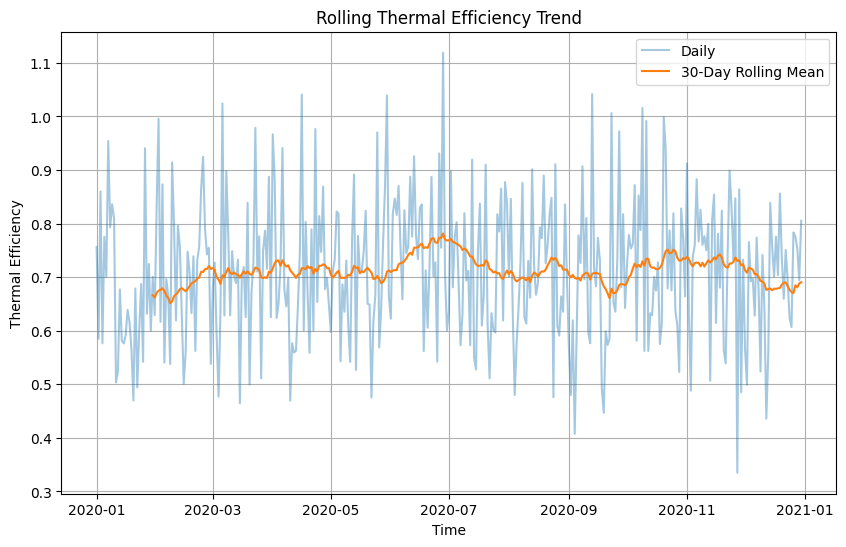

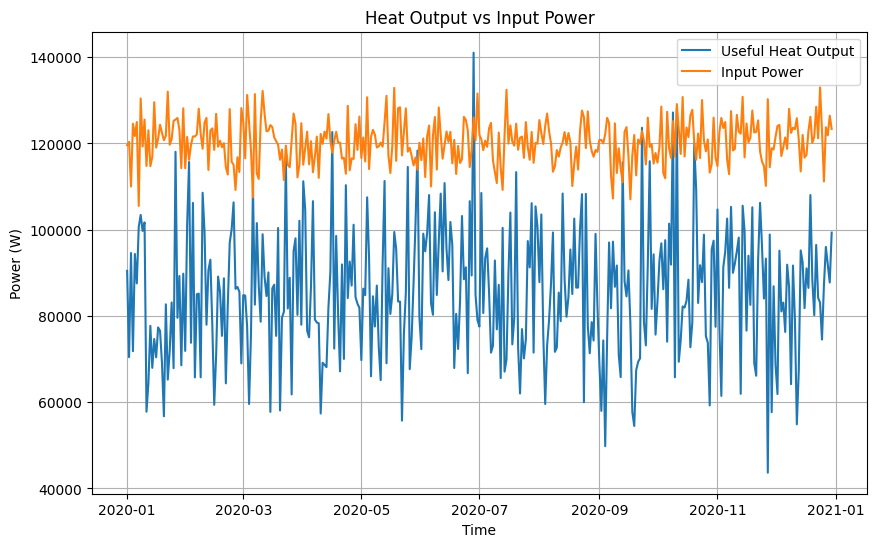


Sample Low-Efficiency Periods:
         Time  Efficiency
19 2020-01-20    0.469774
21 2020-01-22    0.494168
63 2020-03-04    0.477067
74 2020-03-15    0.464810
79 2020-03-20    0.499685

Analysis complete.
This project demonstrates:
- Renewable energy time-series analysis
- Rolling trend and variability detection
- Country-level renewable deployment comparison
- Physically correct heat-transfer modeling
- Thermal efficiency evaluation using first principles



In [4]:
# ============================================================
# Renewable Energy Production + Heat Transfer & Efficiency
# Complete Energy Systems Time-Series Analysis
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.grid"] = True

# ============================================================
# PART 0 — ROBUST DATASET DISCOVERY (FIXED)
# ============================================================

def find_dataset(filename_candidates, search_path="."):
    """
    Recursively search for dataset file starting from search_path.
    """
    for root, dirs, files in os.walk(search_path):
        for file in files:
            if file in filename_candidates:
                return os.path.join(root, file)
    return None

filename_candidates = [
    "renewable_energy.csv",
    "Renewable.csv"
]

file_path = find_dataset(filename_candidates)

if file_path is None:
    raise FileNotFoundError(
        "Dataset not found.\n"
        "Make sure the renewable energy CSV file is in the project folder.\n"
        "Accepted filenames: renewable_energy.csv or Renewable.csv"
    )

print(f" Dataset found: {file_path}")

df = pd.read_csv(file_path)

# ============================================================
# PART 1 — RENEWABLE ENERGY PRODUCTION ANALYSIS
# ============================================================

# ----------------------------
# Data Cleaning & Structuring
# ----------------------------
columns_needed = [
    "LOCATION",
    "INDICATOR",
    "SUBJECT",
    "MEASURE",
    "FREQUENCY",
    "TIME",
    "Value"
]

df = df[columns_needed]
df["TIME"] = df["TIME"].astype(int)
df = df.dropna(subset=["Value"])
df = df[df["Value"] >= 0]
df = df.sort_values(by=["LOCATION", "TIME"])

# ----------------------------
# Descriptive Statistics
# ----------------------------
print("\nGlobal Renewable Energy Production Statistics:")
print(df["Value"].describe())

# ----------------------------
# Global Renewable Energy Trend
# ----------------------------
global_renewable = (
    df.groupby("TIME")["Value"]
    .sum()
    .reset_index()
)

plt.plot(global_renewable["TIME"], global_renewable["Value"])
plt.xlabel("Year")
plt.ylabel("Renewable Energy Production (ktoe)")
plt.title("Global Renewable Energy Production Over Time")
plt.show()

# ----------------------------
# Rolling Trend & Variability
# ----------------------------
global_renewable["Rolling_Mean_5Y"] = global_renewable["Value"].rolling(5).mean()
global_renewable["Rolling_Std_5Y"] = global_renewable["Value"].rolling(5).std()

plt.plot(global_renewable["TIME"], global_renewable["Value"], alpha=0.4, label="Annual")
plt.plot(global_renewable["TIME"], global_renewable["Rolling_Mean_5Y"], label="5-Year Rolling Mean")
plt.xlabel("Year")
plt.ylabel("Renewable Energy Production (ktoe)")
plt.title("Global Renewable Energy Production with Rolling Mean")
plt.legend()
plt.show()

plt.plot(global_renewable["TIME"], global_renewable["Rolling_Std_5Y"])
plt.xlabel("Year")
plt.ylabel("Rolling Std (ktoe)")
plt.title("Variability in Renewable Energy Production")
plt.show()

# ----------------------------
# Country-Level Analysis
# ----------------------------
top_countries = (
    df.groupby("LOCATION")["Value"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

df_top = df[df["LOCATION"].isin(top_countries)]

for country in top_countries:
    country_data = df_top[df_top["LOCATION"] == country]
    plt.plot(country_data["TIME"], country_data["Value"], label=country)

plt.xlabel("Year")
plt.ylabel("Renewable Energy Production (ktoe)")
plt.title("Renewable Energy Production by Country")
plt.legend()
plt.show()

# ----------------------------
# Normalized Growth Comparison
# ----------------------------
normalized_list = []

for country in top_countries:
    country_df = df_top[df_top["LOCATION"] == country].copy()
    country_df["Normalized"] = country_df["Value"] / country_df["Value"].iloc[0]
    normalized_list.append(country_df)

normalized_df = pd.concat(normalized_list)

for country in top_countries:
    data = normalized_df[normalized_df["LOCATION"] == country]
    plt.plot(data["TIME"], data["Normalized"], label=country)

plt.xlabel("Year")
plt.ylabel("Normalized Renewable Production")
plt.title("Normalized Renewable Energy Growth Comparison")
plt.legend()
plt.show()

# ----------------------------
# Supply-Side Growth Interpretation
# ----------------------------
global_renewable["YoY_Growth_%"] = global_renewable["Value"].pct_change() * 100

plt.plot(global_renewable["TIME"], global_renewable["YoY_Growth_%"])
plt.xlabel("Year")
plt.ylabel("Year-over-Year Growth (%)")
plt.title("Year-over-Year Growth in Global Renewable Energy Production")
plt.show()

# ============================================================
# PART 2 — HEAT TRANSFER & THERMAL EFFICIENCY ANALYSIS
# ============================================================

np.random.seed(42)

# ----------------------------
# Synthetic Thermal System Data
# ----------------------------
time = pd.date_range(start="2020-01-01", periods=365, freq="D")

mass_flow_rate = np.random.normal(2.0, 0.2, size=len(time))  # kg/s
cp = 4186  # J/(kg·K), water

T_in = np.random.normal(60, 2, size=len(time))          # °C
T_out = T_in + np.random.normal(10, 1.5, size=len(time))  # °C

input_power = np.random.normal(120_000, 5_000, size=len(time))  # W

thermal_df = pd.DataFrame({
    "Time": time,
    "Mass_Flow_kg_s": mass_flow_rate,
    "T_in_C": T_in,
    "T_out_C": T_out,
    "Input_Power_W": input_power
})

# ----------------------------
# Heat Transfer Calculation
# Q = m_dot * cp * ΔT
# ----------------------------
thermal_df["Delta_T"] = thermal_df["T_out_C"] - thermal_df["T_in_C"]
thermal_df["Heat_Output_W"] = (
    thermal_df["Mass_Flow_kg_s"] * cp * thermal_df["Delta_T"]
)

# ----------------------------
# Thermal Efficiency
# η = Q_useful / P_input
# ----------------------------
thermal_df["Efficiency"] = thermal_df["Heat_Output_W"] / thermal_df["Input_Power_W"]

print("\nThermal System Efficiency Statistics:")
print(thermal_df["Efficiency"].describe())

# ----------------------------
# Efficiency Over Time
# ----------------------------
plt.plot(thermal_df["Time"], thermal_df["Efficiency"])
plt.xlabel("Time")
plt.ylabel("Thermal Efficiency")
plt.title("Thermal System Efficiency Over Time")
plt.show()

# ----------------------------
# Rolling Efficiency Trend
# ----------------------------
thermal_df["Efficiency_Rolling_30D"] = thermal_df["Efficiency"].rolling(30).mean()

plt.plot(thermal_df["Time"], thermal_df["Efficiency"], alpha=0.4, label="Daily")
plt.plot(thermal_df["Time"], thermal_df["Efficiency_Rolling_30D"], label="30-Day Rolling Mean")
plt.xlabel("Time")
plt.ylabel("Thermal Efficiency")
plt.title("Rolling Thermal Efficiency Trend")
plt.legend()
plt.show()

# ----------------------------
# Heat Output vs Input Power
# ----------------------------
plt.plot(thermal_df["Time"], thermal_df["Heat_Output_W"], label="Useful Heat Output")
plt.plot(thermal_df["Time"], thermal_df["Input_Power_W"], label="Input Power")
plt.xlabel("Time")
plt.ylabel("Power (W)")
plt.title("Heat Output vs Input Power")
plt.legend()
plt.show()

# ----------------------------
# Low-Efficiency Periods
# ----------------------------
low_efficiency = thermal_df[thermal_df["Efficiency"] < 0.5]

print("\nSample Low-Efficiency Periods:")
print(low_efficiency[["Time", "Efficiency"]].head())

# ============================================================
# FINAL SUMMARY
# ============================================================

print(
    "\nAnalysis complete.\n"
    "This project demonstrates:\n"
    "- Renewable energy time-series analysis\n"
    "- Rolling trend and variability detection\n"
    "- Country-level renewable deployment comparison\n"
    "- Physically correct heat-transfer modeling\n"
    "- Thermal efficiency evaluation using first principles\n"
)
